In [1]:
from model import SlidingMode
import torch

config = "./pendulum-sign.yaml"

lambda_ = 2.0
k_ = 1.0

params = torch.tensor([lambda_, k_]).float() # see your config for the order of the params

model = SlidingMode(config, init=params, mse_reduction="sum")

In [2]:
time = 10 # 10 seconds
delta = 0.1 # 0.1 seconds --> 10 / 0.1 = 100 steps

system_variables, desired_values, loss = model(time, delta)

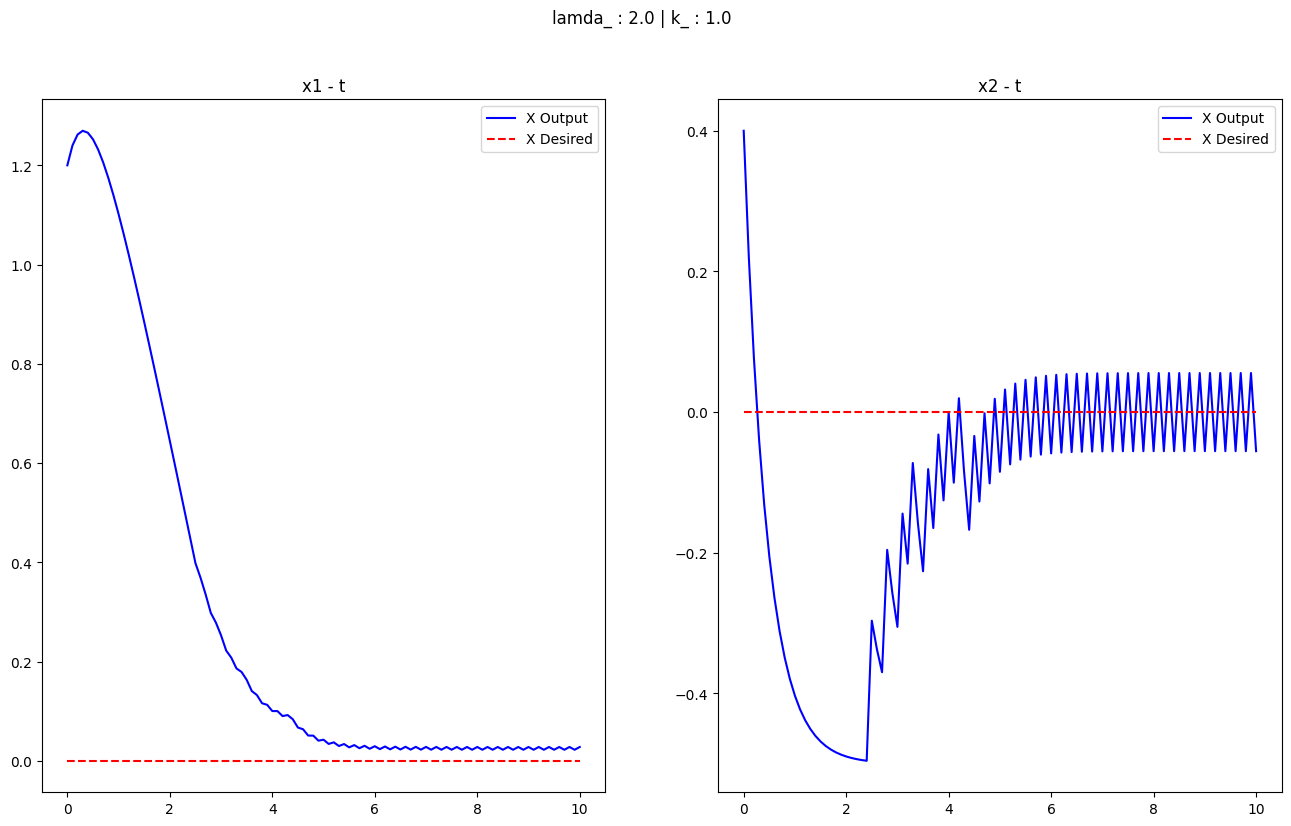

In [3]:
import matplotlib.pyplot as plt
import numpy as np

time_steps = np.arange(0.0, time + delta, delta) # time + delta so the time window would be [0..time] and not [0..time)

fig, ax = plt.subplots(1, len(params), figsize=(16,9))
sv_name = list(model.system_variable_names)
for i in range(len(ax)):
    ax[i].plot(time_steps, system_variables[:,i].numpy(), label="X Output", color="blue")
    ax[i].plot(time_steps, desired_values[:,i].numpy(), label="X Desired", color="red", linestyle="--")
    ax[i].title.set_text(f"{sv_name[i]} - t")
    ax[i].legend()
super_title = [f"{k} : {v}" for k, v in zip(model.param_names, model.params)]
plt.suptitle(" | ".join(super_title))

plt.show()